In [48]:
import pandas as pd
import numpy as np
from statistics import mean, stdev
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import metrics
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from time import time
from xgboost import plot_importance

In [2]:
#load data
train = pd.read_csv('C:/Stats Consulting/train_final.csv')
train.head()

,user_id,seller_id,label,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,...,user_seller_add_to_favorite_cnt_db11_mth,user_seller_click_rt_db11,user_seller_purchase_rt_db11,user_seller_add_to_favorite_rt_db11,user_seller_click_rt_db11_wk,user_seller_purchase_rt_db11_wk,user_seller_add_to_favorite_rt_db11_wk,user_seller_click_rt_db11_mth,user_seller_purchase_rt_db11_mth,user_seller_add_to_favorite_rt_db11_mth
0,34176,3906,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34176,121,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34176,4356,1,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34176,2217,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,230784,4818,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
test = pd.read_csv('C:/Stats Consulting/test_final.csv')
test.head()

,user_id,seller_id,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,user_age_35_39,...,user_seller_add_to_favorite_cnt_db11_mth,user_seller_click_rt_db11,user_seller_purchase_rt_db11,user_seller_add_to_favorite_rt_db11,user_seller_click_rt_db11_wk,user_seller_purchase_rt_db11_wk,user_seller_add_to_favorite_rt_db11_wk,user_seller_click_rt_db11_mth,user_seller_purchase_rt_db11_mth,user_seller_add_to_favorite_rt_db11_mth
0,163968,4605,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360576,1581,0,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,1.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98688,1964,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98688,3645,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,295296,3361,0,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#fill all infinite entry with 0
train = train.replace(np.inf, 0)
test = test.replace(np.inf, 0)

In [5]:
#data split (training_set, testing_set)
data_output = train.label
data_input = train.drop('label',axis=1)
#unbalanced
data_output.sum()/data_output.count()

0.06115063788027478

In [6]:
training_set_x, testing_set_x, training_set_y, testing_set_y = train_test_split(data_input, data_output, test_size=0.3, random_state=1)
print(training_set_x.shape, testing_set_x.shape, training_set_y.shape, testing_set_y.shape)

(182604, 81) (78260, 81) (182604,) (78260,)


In [7]:
np.isfinite(training_set_x).all()

user_id                                    True
seller_id                                  True
user_gender_female                         True
user_gender_male                           True
user_gender_unknown                        True
                                           ... 
user_seller_purchase_rt_db11_wk            True
user_seller_add_to_favorite_rt_db11_wk     True
user_seller_click_rt_db11_mth              True
user_seller_purchase_rt_db11_mth           True
user_seller_add_to_favorite_rt_db11_mth    True
Length: 81, dtype: bool

In [8]:
#initial model fitting
#random forest
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini',bootstrap= True,max_features ='sqrt')
#fit on training data
model_rf.fit(training_set_x, training_set_y)
#predictions
rf_predictions = model_rf.predict(testing_set_x)
rf_probs = model_rf.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:',metrics.accuracy_score(testing_set_y, rf_predictions))
print('ROC AUC:', metrics.roc_auc_score(testing_set_y, rf_probs))

Accuracy: 0.9381037567084078
ROC AUC: 0.6337082079462185


In [9]:
np.mean(rf_predictions)

0.00016611295681063124

In [10]:
#Gradient Boosting
model_gbm = lgb.LGBMClassifier(objective='binary', metric='binary_logloss',learning_rate=0.03)
#fit on training data
model_gbm.fit(training_set_x, training_set_y)
#predictions
gbm_predictions = model_gbm.predict(testing_set_x)
gbm_probs = model_gbm.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, gbm_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, gbm_probs))

Accuracy: 0.9381165346281626
ROC AUC 0.6608758699703369


In [11]:
np.mean(gbm_predictions)

0.0

In [12]:
#XGB
model_xgb = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
#fit on training data
model_xgb.fit(training_set_x, training_set_y)
#predictions
xgb_predictions = model_xgb.predict(testing_set_x)
xgb_probs = model_xgb.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, xgb_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, xgb_probs))

Accuracy: 0.9381420904676718
ROC AUC 0.6679874951446462


In [13]:
np.mean(xgb_predictions)

0.0001277791975466394

In [14]:
#SMOTE
sm = SMOTE(random_state=2)
training_set_x_res, training_set_y_res = sm.fit_sample(training_set_x, training_set_y.ravel())
#print percentage of output after oversampling
print('After oversampling, counts of label 1:',format(sum(training_set_y_res==1)))
print('After oversampling, counts of label 0:',format(sum(training_set_y_res==0)))

After oversampling, counts of label 1: 171495
After oversampling, counts of label 0: 171495


In [15]:
#random forest model fitting with over sampling data
model_rf_2 = RandomForestClassifier(n_estimators=100, criterion='gini',bootstrap= True,max_features ='sqrt')
#fit on training data
model_rf_2.fit(training_set_x_res, training_set_y_res)
#predictions
rf2_predictions = model_rf_2.predict(testing_set_x)
rf2_probs = model_rf_2.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:',metrics.accuracy_score(testing_set_y, rf2_predictions))
print('ROC AUC:', metrics.roc_auc_score(testing_set_y, rf2_probs))

Accuracy: 0.93764375159724
ROC AUC: 0.6193431609717164


In [16]:
np.mean(rf2_predictions)

0.0010350115001277792

In [17]:
#Gradient Boosting
model_gbm_2 = lgb.LGBMClassifier(objective='binary', metric='binary_logloss',learning_rate=0.03)
#fit on training data
model_gbm_2.fit(training_set_x_res, training_set_y_res)
#predictions
gbm2_predictions = model_gbm_2.predict(testing_set_x)
gbm2_probs = model_gbm_2.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, gbm2_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, gbm2_probs))

Accuracy: 0.9380782008688986
ROC AUC 0.6003051801336191


In [18]:
np.mean(gbm2_predictions)

0.00011500127779197546

In [19]:
#XGB
model_xgb_2 = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
#fit on training data
model_xgb_2.fit(training_set_x_res, training_set_y_res)
#predictions
xgb_2_predictions = model_xgb_2.predict(testing_set_x)
xgb_2_probs = model_xgb_2.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, xgb_2_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, xgb_2_probs))

Accuracy: 0.9380270891898799
ROC AUC 0.6333020919697747


In [20]:
np.mean(xgb_2_predictions)

0.00024278047533861488

In [21]:
#RUS (under sampling)
rus = RandomUnderSampler()
training_x_rus, training_y_rus = rus.fit_sample(training_set_x, training_set_y)
#print percentage of output after oversampling
print('After undersampling, counts of label 1:',format(sum(training_y_rus==1)))
print('After undersampling, counts of label 0:',format(sum(training_y_rus==0)))

After undersampling, counts of label 1: 11109
After undersampling, counts of label 0: 11109


In [22]:
#random forest model fitting with under sampling data
model_rf_3 = RandomForestClassifier(n_estimators=100, criterion='gini',bootstrap= True,max_features ='sqrt')
#fit on training data
model_rf_3.fit(training_x_rus, training_y_rus)
#predictions
rf3_predictions = model_rf_3.predict(testing_set_x)
rf3_probs = model_rf_3.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:',metrics.accuracy_score(testing_set_y, rf3_predictions))
print('ROC AUC:', metrics.roc_auc_score(testing_set_y, rf3_probs))

Accuracy: 0.6394454382826475
ROC AUC: 0.6516524630933409


In [23]:
np.mean(rf3_predictions)

0.3700485560950677

In [24]:
#Gradient Boosting
model_gbm_3 = lgb.LGBMClassifier(objective='binary', metric='binary_logloss',learning_rate=0.03)
#fit on training data
model_gbm_3.fit(training_x_rus, training_y_rus)
#predictions
gbm3_predictions = model_gbm_3.predict(testing_set_x)
gbm3_probs = model_gbm_3.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, gbm3_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, gbm3_probs))

Accuracy: 0.6489138768208536
ROC AUC 0.6591725385995589


In [25]:
np.mean(gbm3_predictions)

0.3605034500383338

In [26]:
#XGB
model_xgb_3 = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
#fit on training data
model_xgb_3.fit(training_x_rus, training_y_rus)
#predictions
xgb_3_predictions = model_xgb_3.predict(testing_set_x)
xgb_3_probs = model_xgb_3.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, xgb_3_predictions))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, xgb_3_probs))

Accuracy: 0.6497572195246614
ROC AUC 0.6635814906097697


In [27]:
np.mean(xgb_2_predictions)

0.00024278047533861488

In [28]:
# define imbalanced stratified k-fold cross validation with different sampling method
def imbalance_cv_score(model, x, y, cv, scoring, sampling_method):
    '''
    This function computes the cross-validation score using a selected sampling method to adjust imbalance dataset, using 
    stratified k-fold cross validation. 
    
    The first five arguments are the same with cross_val_score in sklearn package
    
    model = selected machine learning model
    x = data input
    y = data outcome(label)
    cv = number of folds(k)
    scoring = scoring metrics selected for evaluation. *Currently support accuracy_score, balance_accuracy, 
    f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, ndcg_score in sklearn.metrics package*
    sampling_method: choice of random sampler: Object that is similar to sampler object from python imbalanced-learn package
    with the method sampling_method.fit_sample()

    '''
    cv_score = []
    test_score = 0
    cv_method = StratifiedKFold(n_splits=cv)
    pred_score_method_list = [metrics.accuracy_score,metrics.balanced_accuracy_score,metrics.f1_score, metrics.precision_score,
                             metrics.recall_score]
    pred_prob_method_list = [metrics.roc_auc_score,metrics.average_precision_score,metrics.ndcg_score]
    for train_index, test_index in cv_method.split(x,y):
        xfold_train, yfold_train = sampling_method.fit_sample(x.iloc[train_index],y.iloc[train_index])
        model.fit(xfold_train, yfold_train)
        model_predictions = model.predict(x.iloc[test_index])
        model_probs = model.predict_proba(x.iloc[test_index])[:, 1]
        if scoring in pred_score_method_list:
            score = scoring(y.iloc[test_index], model_predictions)
        elif scoring in pred_prob_method_list:
            score = scoring(y.iloc[test_index], model_probs)
        else:
            print('Sorry, Current scoring method not available now.')
        cv_score.append(score)
    return cv_score

In [30]:
Random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini',bootstrap= True,max_features ='sqrt')
GBM_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss',learning_rate=0.03)
XGB_model = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
model_list= [Random_forest_model, GBM_model, XGB_model]
sampler_list = [SMOTE(),RandomUnderSampler(),ADASYN()]
results_acc = []
time_res = []
names = []
for model in model_list:
    name = model.__class__.__name__
    for sm in sampler_list:
        start = time()
        sm_name = sm.__class__.__name__
        scores = imbalance_cv_score(model, data_input, data_output, 5, metrics.accuracy_score, sm)
        results_acc.append(mean(scores))
        names.append(name)
        end = time()
        time_use = end - start
        time_res.append(time_use)
        print('The accuracy score for ', name, 'is ', mean(scores), 
              'with the Std of', stdev(scores), 'using sampling method ', sm_name, 'in time: ',time_use)

The accuracy score for  RandomForestClassifier is  0.9382398492013223 with the Std of 0.00015293264303280934 using sampling method  SMOTE in time:  1231.3711059093475
The accuracy score for  RandomForestClassifier is  0.6374471015246651 with the Std of 0.002790411416998459 using sampling method  RandomUnderSampler in time:  63.44834589958191
The accuracy score for  RandomForestClassifier is  0.9382666834451044 with the Std of 0.00013556105625578475 using sampling method  ADASYN in time:  1118.9550387859344
The accuracy score for  LGBMClassifier is  0.9388033608261737 with the Std of 5.854392841208983e-05 using sampling method  SMOTE in time:  54.709526777267456
The accuracy score for  LGBMClassifier is  0.6474407775161187 with the Std of 0.005540523437637553 using sampling method  RandomUnderSampler in time:  11.965383768081665
The accuracy score for  LGBMClassifier is  0.9387918602575391 with the Std of 9.40251567288814e-05 using sampling method  ADASYN in time:  136.5664381980896
The

In [33]:
time_res = pd.DataFrame(time_res, columns=['Time'])
acc_res = pd.DataFrame(results_acc, columns=['Accuracy_score'])

In [37]:
results_auc = []
names = []
time_res_2 = []
for model in model_list:
    name = model.__class__.__name__
    for sm in sampler_list:
        start = time()
        sm_name = sm.__class__.__name__
        scores = imbalance_cv_score(model, data_input, data_output, 5, metrics.roc_auc_score, sm)
        results_auc.append(mean(scores))
        names.append(name)
        end = time()
        time_use = end - start
        time_res_2.append(time_use)
        print('The AUC score for ', name, 'is ', mean(scores), 
              'with the Std of',stdev(scores), 'using sampling method ', sm_name, 'in time: ',time_use)

The AUC score for  RandomForestClassifier is  0.6212953361274457 with the Std of 0.003804053758477356 using sampling method  SMOTE in time:  1185.036315202713
The AUC score for  RandomForestClassifier is  0.6538747064232322 with the Std of 0.0034380191473210304 using sampling method  RandomUnderSampler in time:  69.96215391159058
The AUC score for  RandomForestClassifier is  0.6217283074515212 with the Std of 0.0050263550697680235 using sampling method  ADASYN in time:  1215.0689871311188
The AUC score for  LGBMClassifier is  0.6050634732040661 with the Std of 0.006675545020362849 using sampling method  SMOTE in time:  84.05602383613586
The AUC score for  LGBMClassifier is  0.6631811266263793 with the Std of 0.0059906170527438225 using sampling method  RandomUnderSampler in time:  10.718226432800293
The AUC score for  LGBMClassifier is  0.6039449926138859 with the Std of 0.007903572687626622 using sampling method  ADASYN in time:  153.51110863685608
The AUC score for  XGBClassifier is 

In [38]:
auc_res = pd.DataFrame(results_auc, columns=['AUC_score'])
sampler = pd.DataFrame({'Sampler_method':['SMOTE','RandomUnderSampler','ADASYN','SMOTE','RandomUnderSampler','ADASYN',
                                        'SMOTE','RandomUnderSampler','ADASYN']})
coef = pd.concat([time_res, acc_res, auc_res, sampler],axis=1)
coef.index=['RF','RF','RF','GBM','GBM','GBM','XGB','XGB','XGB']

In [45]:
coef.to_csv('C:/Stats Consulting/Coef.csv')

In [44]:
coef

,Time,Accuracy_score,AUC_score,Sampler_method
RF,1231.371106,0.938240,0.621295,SMOTE
RF,63.448346,0.637447,0.653875,RandomUnderSampler
RF,1118.955039,0.938267,0.621728,ADASYN
GBM,54.709527,0.938803,0.605063,SMOTE
GBM,11.965384,0.647441,0.663181,RandomUnderSampler
GBM,136.566438,0.938792,0.603945,ADASYN
XGB,460.935191,0.938765,0.639072,SMOTE
XGB,24.193974,0.650868,0.664347,RandomUnderSampler
XGB,513.550205,0.938792,0.640512,ADASYN


In [46]:
#  best model
XGB_model = XGBClassifier(objective ='binary:logistic', learning_rate=0.1)
# data sampling using ADASYN
ada = ADASYN()
training_x_ada, training_y_ada = ada.fit_sample(training_set_x, training_set_y)
#print percentage of output after oversampling
print('After oversampling, counts of label 1:',format(sum(training_y_ada==1)))
print('After oversampling, counts of label 0:',format(sum(training_y_ada==0)))
#fit on training data
XGB_model.fit(training_x_ada, training_y_ada)
#predictions
best_model_pred = XGB_model.predict(testing_set_x)
best_model_probs = XGB_model.predict_proba(testing_set_x)[:, 1]
#check model accuracy, ROC AUC
print('Accuracy:', metrics.accuracy_score(testing_set_y, best_model_pred))
print('ROC AUC', metrics.roc_auc_score(testing_set_y, best_model_probs))

After oversampling, counts of label 1: 173721
After oversampling, counts of label 0: 171495
Accuracy: 0.9380654229491439
ROC AUC 0.6362301555914573


In [47]:
np.mean(best_model_pred)

0.00017889087656529517

In [51]:
XGB_model.get_booster().get_score(importance_type='weight')

{'user_seller_purchase_day_rt': 467,
 'user_seller_item_cnt': 80,
 'user_gender_male': 81,
 'user_gender_female': 179,
 'user_gender_unknown': 47,
 'user_age_30_34': 118,
 'seller_purchase_cnt': 65,
 'user_age_35_39': 71,
 'user_age_25_29': 137,
 'user_item_cnt': 430,
 'seller_id': 123,
 'user_seller_click_days': 75,
 'user_seller_purchase_rt': 222,
 'user_age_40_49': 52,
 'user_seller_action_total_cnt': 54,
 'brand_similarity_score': 187,
 'cat_similarity_score': 101,
 'seller_cat_cnt': 74,
 'user_id': 125,
 'user_age_18_24': 44,
 'user_purchase_day_rt': 119,
 'user_purchase_rt': 183,
 'seller_add_to_cart_cnt': 59,
 'user_seller_add_to_favorite_days': 29,
 'user_seller_click_cnt_db11': 68,
 'seller_purchase_rt': 131,
 'user_seller_purchase_cnt_db11': 44,
 'user_action_total_cnt': 38,
 'user_age_50_': 20,
 'user_seller_add_to_cart_days': 8,
 'user_seller_click_cnt': 38,
 'user_purchase_cnt': 41,
 'seller_brand_cnt': 145,
 'seller_action_total_cnt': 17,
 'user_seller_click_rt_db11': 41,

In [52]:
XGB_model.get_booster().get_score(importance_type='gain')

{'user_seller_purchase_day_rt': 1663.7889918866579,
 'user_seller_item_cnt': 172.62350064045,
 'user_gender_male': 529.6622863827248,
 'user_gender_female': 756.1712757030954,
 'user_gender_unknown': 1880.4207659554652,
 'user_age_30_34': 957.5117736550765,
 'seller_purchase_cnt': 29.632666648461527,
 'user_age_35_39': 583.1545372638847,
 'user_age_25_29': 1335.642001718111,
 'user_item_cnt': 762.3806662330095,
 'seller_id': 12.308176037878864,
 'user_seller_click_days': 125.87090655986664,
 'user_seller_purchase_rt': 268.87111408697297,
 'user_age_40_49': 640.7645976620962,
 'user_seller_action_total_cnt': 40.596852235549996,
 'brand_similarity_score': 95.66957847706949,
 'cat_similarity_score': 28.516335656316844,
 'seller_cat_cnt': 313.3703558531894,
 'user_id': 8.005828040751998,
 'user_age_18_24': 1233.5265127745452,
 'user_purchase_day_rt': 39.85381919201932,
 'user_purchase_rt': 34.730722646591786,
 'seller_add_to_cart_cnt': 28.18183887727119,
 'user_seller_add_to_favorite_days'

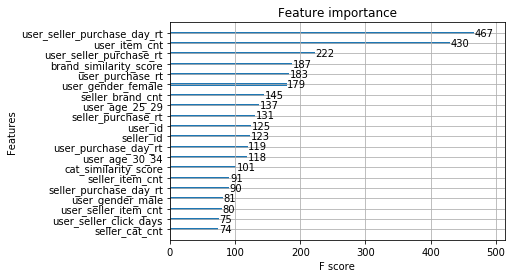

<Figure size 432x288 with 0 Axes>

In [57]:
plot_importance(XGB_model, max_num_features=20)
pyplot.show()
pyplot.savefig('C:/Stats Consulting/feature_importance_plot.pdf')

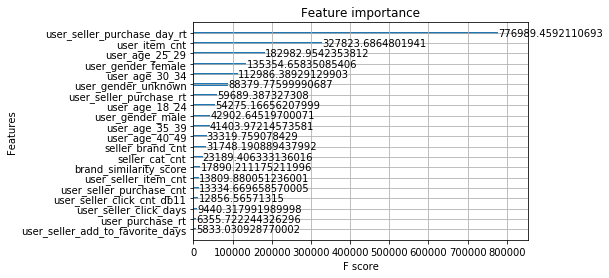

<Figure size 432x288 with 0 Axes>

In [63]:
plot_importance(XGB_model.get_booster().get_score(importance_type='total_gain'), max_num_features=20)
pyplot.show()
pyplot.savefig('C:/Stats Consulting/feature_importance_plot_gain.pdf')